# Probability Distributions

## Random Variables

In [1]:
#Listing 3.1: A simple random variable
using StatsBase, Plots; pyplot()
names = ["Mary","Mel","David","John","Kayley","Anderson"]
randomName() = rand(names)
X = 3:8
N = 10^6
sampleLengths = [length(randomName()) for _ in 1:N]

1000000-element Array{Int64,1}:
 5
 8
 4
 3
 8
 4
 8
 4
 4
 4
 5
 4
 6
 ⋮
 4
 6
 3
 5
 3
 8
 6
 8
 5
 3
 5
 4

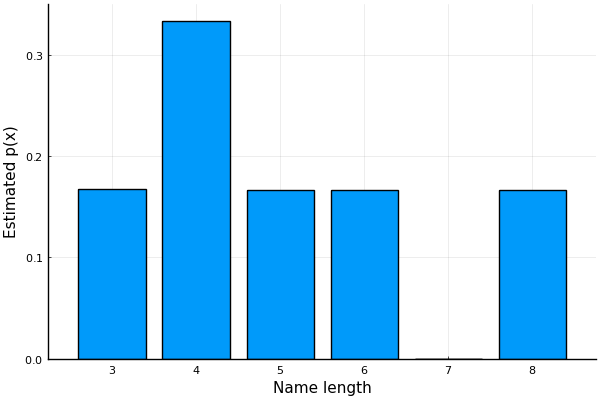

In [2]:
bar(X, counts(sampleLengths)/N, ylims=(0,0.35), xlabel="Name length", ylabel="Estimated p(x)", legend=:none)

### Types of Random Variables

In [7]:
# using Pkg;
# Pkg.add("Measures")

   Updating registry at `~/.julia/registries/General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
  [442fdcdd] + Measures v0.3.1
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]


In [8]:
# Listing 3.2: Plotting discrete and continuous distributions
using Plots, Measures; pyplot()

pDiscrete = [0.25, 0.25, 0.5]
xGridD = 0:2

0:2

In [9]:
pContinuous(x) = 3/4*(1 - x^2)
xGridC = -1:0.01:1

-1.0:0.01:1.0

In [12]:
pContinuous2(x) = x < 0 ? x+1 : 1-x

pContinuous2 (generic function with 1 method)

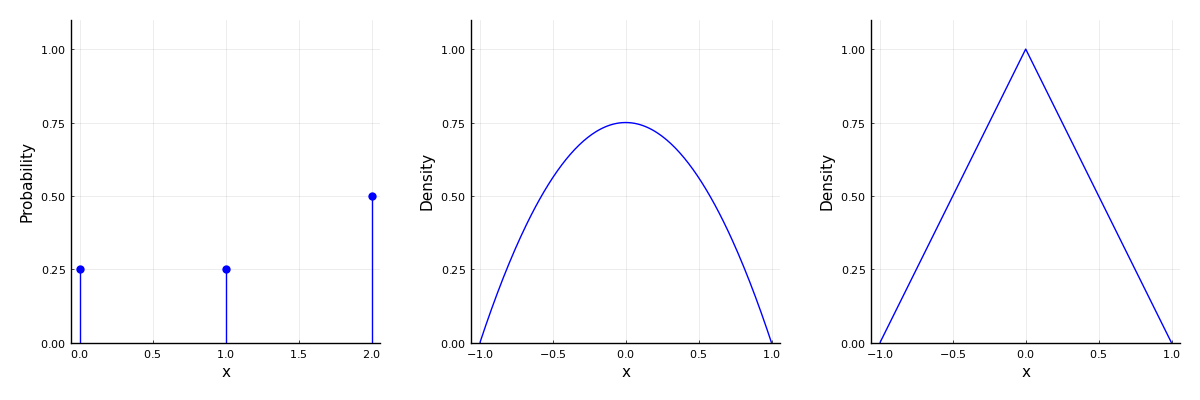

In [15]:
p1 = plot(xGridD, line=:stem, pDiscrete, marker=:circle, c=:blue, ms=6, msw=0)
p2 = plot(xGridC, pContinuous.(xGridC), c=:blue)
p3 = plot(xGridC, pContinuous2.(xGridC), c=:blue)
plot(p1, p2, p3, layout=(1,3), legend=false, ylims=(0,1.1), xlabel="x",
    ylabel=["Probability" "Density" "Density"], size=(1200, 400), margin=5mm)

## Moment Based Descriptors

### Mean

In [2]:
# using Pkg;
# Pkg.add("QuadGK")

   Updating registry at `~/.julia/registries/General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


  Resolving package versions...
  Installed QuadGK ─ v2.4.1
   Updating `~/.julia/environments/v1.4/Project.toml`
  [1fd47b50] + QuadGK v2.4.1
   Updating `~/.julia/environments/v1.4/Manifest.toml`
  [1fd47b50] + QuadGK v2.4.1


In [3]:
# Listing 3.3: Expectation via numerical integration
using QuadGK

sup = (-1,1)
f1(x) = 3/4*(1-x^2)
f2(x) = x < 0 ? x+1 : 1-x

┌ Info: Precompiling QuadGK [1fd47b50-473d-5c70-9696-f719f8f3bcdc]
└ @ Base loading.jl:1260


f2 (generic function with 1 method)

In [4]:
expect(f, support) = quadgk((x) -> x*f(x), support...)[1]

expect (generic function with 1 method)

In [5]:
println("Mean 1: ", expect(f1,sup))

Mean 1: 0.0


In [6]:
println("Mean 2: ", expect(f2,sup))

Mean 2: -2.0816681711721685e-17


### Variance

In [8]:
# using Pkg;
# Pkg.add("Distributions")

  Resolving package versions...
  Installed Rmath ───────── v0.6.1
  Installed FillArrays ──── v0.11.5
  Installed Rmath_jll ───── v0.2.2+1
  Installed PDMats ──────── v0.10.1
  Installed StatsFuns ───── v0.9.6
  Installed Distributions ─ v0.24.14
######################################################################### 100.0%
   Updating `~/.julia/environments/v1.4/Project.toml`
  [31c24e10] + Distributions v0.24.14
   Updating `~/.julia/environments/v1.4/Manifest.toml`
  [31c24e10] + Distributions v0.24.14
  [1a297f60] + FillArrays v0.11.5
  [90014a1f] + PDMats v0.10.1
  [79098fc4] + Rmath v0.6.1
  [f50d1b31] + Rmath_jll v0.2.2+1
  [4c63d2b9] + StatsFuns v0.9.6
  [4607b0f0] + SuiteSparse 


In [9]:
# Listing 3.4: Variance of X as the mean of Y
using Distributions, Plots; pyplot()

┌ Info: Precompiling Distributions [31c24e10-a181-5473-b8eb-7969acd0382f]
└ @ Base loading.jl:1260


Plots.PyPlotBackend()

In [10]:
dist = TriangularDist(4,6,5)
N = 10^6
data = rand(dist, N)
yData = (data .- 5) .^2

1000000-element Array{Float64,1}:
 0.00875953189439306
 0.004835482844022444
 0.16948639636834173
 0.15185382352720866
 0.8647632659010025
 0.14948447141716617
 0.14956366708780913
 0.06010342463870764
 0.005708816991255036
 0.022740551589104253
 0.23361036073974764
 0.18178744960819437
 0.034366074786314135
 ⋮
 0.0004660140712147656
 0.07480133027143603
 0.0014264253388969427
 0.0019029439321345827
 0.3070592733085899
 0.1259682519271399
 0.027502757952092234
 0.14089450312428625
 0.21985534465670756
 0.07155767906253356
 0.4230001765608151
 1.9170450031156798e-5

In [11]:
println("Mean: ", mean(yData), " Variance: ", var(data))

Mean: 0.16669665367282385 Variance: 0.16669532612993418


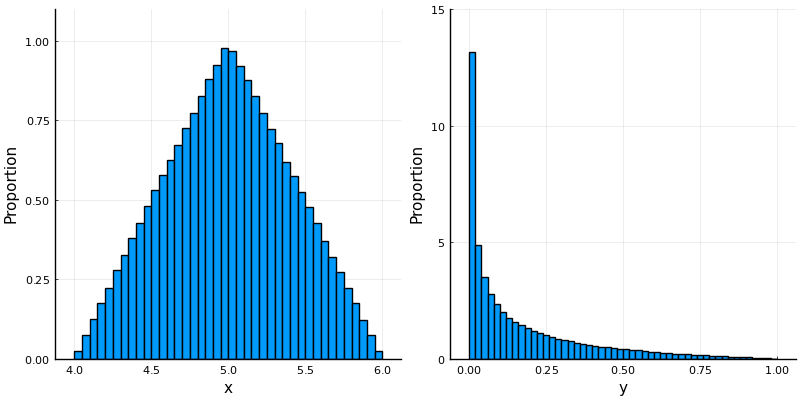

In [12]:
p1 = histogram(data, xlabel="x", bins=80, normed=true, ylims=(0,1.1))
p2 = histogram(yData, xlabel="y", bins=80, normed=true, ylims=(0,15))
plot(p1, p2, ylabel="Proportion", size=(800, 400), legend=:none)